In [32]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import hashlib
import mlflow 
import matplotlib.pyplot as plt
import tempfile

import mlflow
mlflow.set_tracking_uri('http://server:5000')

In [9]:
mlflow.set_experiment("diabetes2")

2024/07/08 10:19:07 INFO mlflow.tracking.fluent: Experiment with name 'diabetes2' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/971852071468765181', creation_time=1720433947595, experiment_id='971852071468765181', last_update_time=1720433947595, lifecycle_stage='active', name='diabetes2', tags={}>

In [ ]:
Dataset(
    name = 'Diabetes'
     

)

dataset = 

'40d7178524ca50c5a8da255a6f04211ad0d1963e'

In [15]:
# Get data
db = load_diabetes()
df = pd.DataFrame(data= np.c_[db['data'], db['target']], columns= db['feature_names'] + ['target'])
dataset = mlflow.data.from_pandas(
    df,
    targets = 'target',
    name="diabetesDataset",
    digest = hashlib.sha1(pd.util.hash_pandas_object(df).values).hexdigest()
)

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], random_state=666)

In [35]:
with tempfile.TemporaryDirectory() as tmp_dir:
    print(tmp_dir)

/tmp/tmpxbaj9a_d


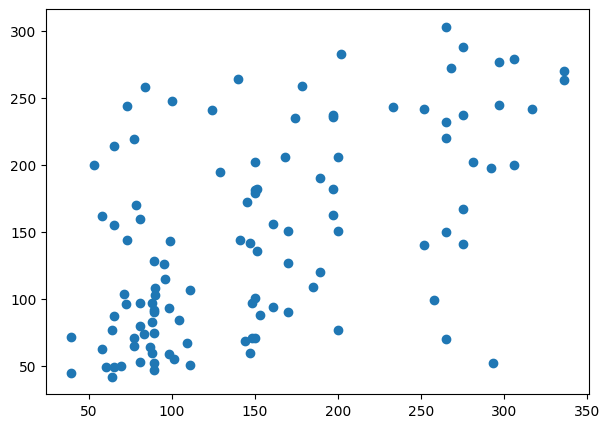

In [38]:
with mlflow.start_run():
    mlflow.set_tag("training_info", "lalala")
    mlflow.set_tag('mlflow.note.content', 'Lovely description, trying out something **new**')
    
    # metadata about the data
    mlflow.log_input(dataset, tags={'mlflow.data.context': 'all_data', 'random_state': '666'})
    
    # The actual data (since log_input is only metadata)
    #mlflow.log_table(X_train, artifact_file = 'data/X_train.parquet')
    #mlflow.log_table(X_train, artifact_file = 'data/X_train.json')

    # Persists any arbitrary file
    #with tempfile.TemporaryDirectory() as tmp_dir:
    #    y_test.to_csv(f'{tmp_dir}/y_test.csv')
    #    mlflow.log_artifacts(tmp_dir, artifact_path="data")
    
    # Train model
    params = {'n_estimators': 1, 'max_depth': 15, 'max_features': 99}
    mlflow.log_params(params)
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        signature=mlflow.models.infer_signature(X_train, model.predict(X_train)),
        input_example=X_train,
        #registered_model_name="tracking-quickstart",
    )

    # Evaluate model
    y_pred = model.predict(X_test)
    mlflow.log_metric("mean_absolute_error_test", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("something_custom", 666)
    
    fig, axs = plt.subplots(figsize=(7, 5))
    plt.scatter(y_pred, y_test)
    mlflow.log_figure(fig, 'predictions.png')
